In [6]:
import numpy as np 
a=np.random.random((10,3))
b=abs(a-0.5)
mask=b.argmin(1)
mask
for n in range (10):
    print (a[n][mask[n]])

0.3006463897448374
0.20941695724546572
0.5237663018782134
0.6338988949000188
0.6649108416255927
0.25649681418108017
0.6269943957738077
0.4334002937150222
0.44540113805692083
0.21134529190291163


In [55]:
a=np.random.random((6,6))
print (np.sum(a,axis=0)/np.min(a,axis=1))

[ 76.50994016  16.43087562  13.63615284  14.82289738 161.47790745
   6.38817491]


In [104]:
x=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
x=np.append(x,1)
np.max(x[np.roll(x==0,1)])

5

In [105]:
x=np.ones(10)
i=np.array([0, 1, 2, 3, 5, 5, 5, 8])
for n in range(len(i)):
    x[i[n]]=x[i[n]]+1
x

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

In [126]:
a=[[1,1],[2,2],[3,3],[4,4]]
len(a)

4

In [1]:
def matrNorm(X):
    n=len(X)
    X=X*X
    Y=np.flip(X,axis=2)
    Z=X+Y
    Z=np.sum(Z,axis=0)
    return Z[0][0]

In [2]:
def Kmeans(D,k,eps):
    cen=np.random.sample((k,1,2))
    w=len(D)
    kl=170
    while kl>eps:
        h=D-cen
        #print (h)
        h=h*h
        #print (h)
        d=np.flip(h,axis=2)
        #print (d)
        d=d+h
        u=np.argmin(d,axis=0)
        u=np.delete(u,slice(1),axis=1)
        #print(u[0][0])
        #print(u [1][1])
        P=np.zeros((w,k))
        Q=np.zeros((w,k))
        O=np.arange(k)
        #print (u)
        #O=np.reshape(O,(4,1))
        Q=Q+O
        P=u+P
        e=np.zeros((w,k))-1
        l=np.ones((w,k))
        m=np.zeros((w,k))
        #print (Q)
        I=np.where(P!=Q,e,P)
        #print(I)
        I=np.where(I<0,m,l)
        #print(I)
        e=np.zeros((w,k,2))
        a=np.reshape(D,(w,1,2))
        mat=a+e
        I1=np.reshape(I,(w,k,1))
        I=I1+e
        #print (mat)
        #print (I)
        #print (mat*I)
        mat=mat*I
        Z=mat.sum(0)/(mat!=0).sum(0)
        Z=np.reshape(Z,(k,1,2))
        #print(Z)
        cen1=cen
        #print("j",j)
        cen=Z
        #print (cen)
        kl=matrNorm(cen-cen1)
        #print(kl)
    #print ("I",I1.shape)
    D=np.reshape(D,(w,1,2))
    cen2=np.reshape(cen,(1,k,2))
    #print((D-cen2).shape)
    #print ("D",D-cen2)
    D1=D-cen2
    D2=D1*D1
    D3=np.flip(D2,axis=2)
    D2=D2+D3
    #print (D2.shape)
    #print(D2)
    D3=np.delete(D2,slice(1),axis=2)
    D3=D3*I1
    #print(D3.shape)
    #print(D3)
    disp=D3.sum()/(w*w)
    #print(disp)
    #print(I1)
    return cen,disp

In [230]:
def norm(y):
    return y[0]*y[0]+y[1]*y[1]

<function matplotlib.pyplot.show(*args, **kw)>

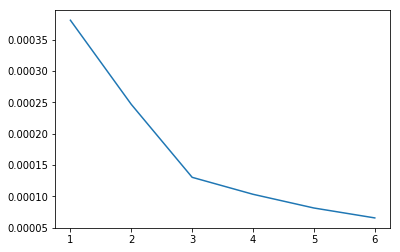

In [25]:
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
a=np.max(data,axis=0)

D=np.zeros((200,2))
for i in range(200):
    for j in range (2):
        D[i][j]=data[i][j+2]/a[j+2]

disp=np.zeros(6)
for i in range (1,7):
    Y,disp[i-1]=Kmeans(D,i,eps)
plt.plot(*np.array([np.arange(1,7),disp]))
plt.show

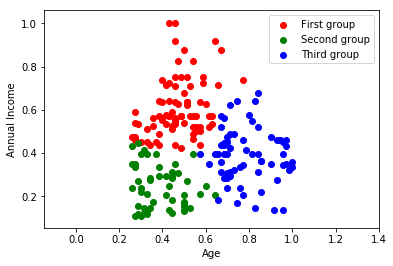

In [28]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
a=np.max(data,axis=0)
#print(a)
D=np.zeros((200,2))
for i in range(200):
    for j in range (2):
        D[i][j]=data[i][j+2]/a[j+2]
#print(D)
k=3
eps=0.001
over=2
Rez,Disp1 = Kmeans(D,k,eps)


Rez = np.reshape(Rez,(3,2))

a = np.zeros((0,2))
b = np.zeros((0,2))
c = np.zeros((0,2))
d = np.zeros((0,2))
for i in range (0,200):
    rast1 = (D[i][0] - Rez[0][0])*(D[i][0] - Rez[0][0]) + (D[i][1] - Rez[0][1])*(D[i][1] - Rez[0][1])
    rast2 = (D[i][0] - Rez[1][0])*(D[i][0] - Rez[1][0]) + (D[i][1] - Rez[1][1])*(D[i][1] - Rez[1][1])
    rast3 = (D[i][0] - Rez[2][0])*(D[i][0] - Rez[2][0]) + (D[i][1] - Rez[2][1])*(D[i][1] - Rez[2][1])
    
    rast = min(rast1,rast2,rast3)
    f=np.zeros(2)
    f[0]=D[i][0]
    f[1]=D[i][1]
    if rast == rast1:
        a = np.append(a,f.reshape(1,2),axis = 0)
    elif rast == rast2:
        b = np.append(b,f.reshape(1,2),axis = 0)
    else:
        c = np.append(c,f.reshape(1,2),axis = 0)
    
#print(d)
plt.scatter(*a.T, c='r', label='First group')
plt.scatter(*(b ).T, c='g', label='Second group')
plt.scatter(*(c ).T, c='b', label='Third group')

plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

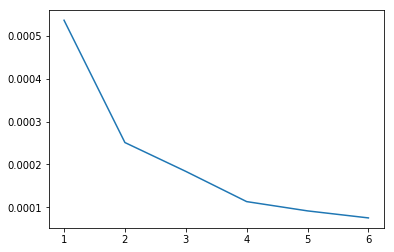

In [29]:
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
a=np.max(data,axis=0)

D=np.zeros((200,2))
for i in range(200):
    D[i][0]=data[i][2]/a[2]
    D[i][1]=data[i][4]/a[4]

disp=np.zeros(6)
for i in range (1,7):
    Y,disp[i-1]=Kmeans(D,i,eps)
plt.plot(*np.array([np.arange(1,7),disp]))
plt.show

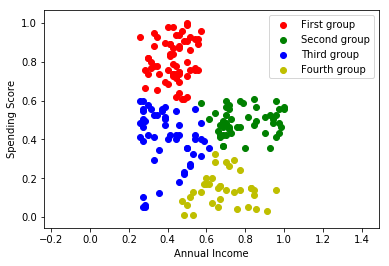

In [35]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
a=np.max(data,axis=0)
#print(a)
D=np.zeros((200,2))
for i in range(200):
    D[i][0]=data[i][2]/a[2]
    D[i][1]=data[i][4]/a[4]
#print(D)
k=4
eps=0.001
over=2
Rez,Disp1 = Kmeans(D,k,eps)

import matplotlib.pyplot as plt
Rez = np.reshape(Rez,(4,2))

a = np.zeros((0,2))
b = np.zeros((0,2))
c = np.zeros((0,2))
d = np.zeros((0,2))
for i in range (0,200):
    rast1 = (D[i][0] - Rez[0][0])*(D[i][0] - Rez[0][0]) + (D[i][1] - Rez[0][1])*(D[i][1] - Rez[0][1])
    rast2 = (D[i][0] - Rez[1][0])*(D[i][0] - Rez[1][0]) + (D[i][1] - Rez[1][1])*(D[i][1] - Rez[1][1])
    rast3 = (D[i][0] - Rez[2][0])*(D[i][0] - Rez[2][0]) + (D[i][1] - Rez[2][1])*(D[i][1] - Rez[2][1])
    rast4 = (D[i][0] - Rez[3][0])*(D[i][0] - Rez[3][0]) + (D[i][1] - Rez[3][1])*(D[i][1] - Rez[3][1])
    rast = min(rast1,rast2,rast3,rast4)
    f=np.zeros(2)
    f[0]=D[i][0]
    f[1]=D[i][1]
    if rast == rast1:
        a = np.append(a,f.reshape(1,2),axis = 0)
    elif rast == rast2:
        b = np.append(b,f.reshape(1,2),axis = 0)
    elif rast==rast3:
        c = np.append(c,f.reshape(1,2),axis = 0)
    else:
        d = np.append(d,f.reshape(1,2),axis = 0)
#print(d)
plt.scatter(*a.T, c='r', label='First group')
plt.scatter(*(b ).T, c='g', label='Second group')
plt.scatter(*(c ).T, c='b', label='Third group')
plt.scatter(*(d ).T, c='y', label='Fourth group')
plt.axis('equal')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

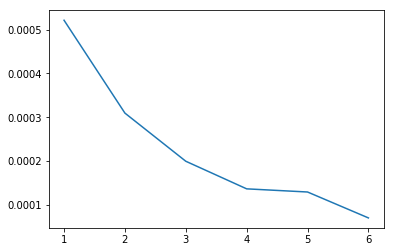

In [36]:
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
a=np.max(data,axis=0)

D=np.zeros((200,2))
for i in range(200):
    D[i][0]=data[i][3]/a[3]
    D[i][1]=data[i][4]/a[4]

disp=np.zeros(6)
for i in range (1,7):
    Y,disp[i-1]=Kmeans(D,i,eps)
plt.plot(*np.array([np.arange(1,7),disp]))
plt.show

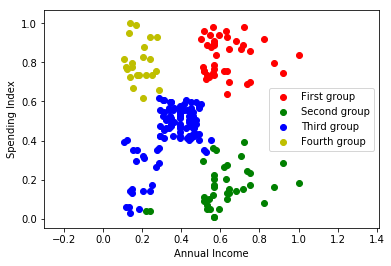

In [37]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
a=np.max(data,axis=0)
#print(a)
D=np.zeros((200,2))
for i in range(200):
    D[i][0]=data[i][3]/a[3]
    D[i][1]=data[i][4]/a[4]
#print(D)
k=4
eps=0.001
over=2
Rez,Disp1 = Kmeans(D,k,eps)


import matplotlib.pyplot as plt
Rez = np.reshape(Rez,(4,2))

a = np.zeros((0,2))
b = np.zeros((0,2))
c = np.zeros((0,2))
d = np.zeros((0,2))
e= np.zeros((0,2))
for i in range (0,200):
    rast1 = (D[i][0] - Rez[0][0])*(D[i][0] - Rez[0][0]) + (D[i][1] - Rez[0][1])*(D[i][1] - Rez[0][1])
    rast2 = (D[i][0] - Rez[1][0])*(D[i][0] - Rez[1][0]) + (D[i][1] - Rez[1][1])*(D[i][1] - Rez[1][1])
    rast3 = (D[i][0] - Rez[2][0])*(D[i][0] - Rez[2][0]) + (D[i][1] - Rez[2][1])*(D[i][1] - Rez[2][1])
    rast4 = (D[i][0] - Rez[3][0])*(D[i][0] - Rez[3][0]) + (D[i][1] - Rez[3][1])*(D[i][1] - Rez[3][1])
    
    rast = min(rast1,rast2,rast3,rast4)
    f=np.zeros(2)
    f[0]=D[i][0]
    f[1]=D[i][1]
    if rast == rast1:
        a = np.append(a,f.reshape(1,2),axis = 0)
    elif rast == rast2:
        b = np.append(b,f.reshape(1,2),axis = 0)
    elif rast == rast3:
        c = np.append(c,f.reshape(1,2),axis = 0)
    else :
        d = np.append(d,f.reshape(1,2),axis = 0)
    
#print(d)
plt.scatter(*a.T, c='r', label='First group')
plt.scatter(*(b ).T, c='g', label='Second group')
plt.scatter(*(c ).T, c='b', label='Third group')
plt.scatter(*(d ).T, c='y', label='Fourth group')

plt.axis('equal')
plt.xlabel('Annual Income')
plt.ylabel('Spending Index')
plt.legend()
plt.show()